# NaN Boxing Benchmarks

In [5]:
# Librairies
%pip install -q matplotlib numpy pandas scikit-learn
import numpy as np
import re
import subprocess
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
INTERPRETER = "./target/release/som-interpreter-bc"
LIBS = "core-lib/Smalltalk core-lib/Examples/Benchmarks core-lib/Examples/Benchmarks/LanguageFeatures core-lib/Examples/Benchmarks/TestSuite core-lib/Examples/Benchmarks/ValBenchmark"

def exec_bench(name, runs=10):
    runtimes = []
    allocations = []

    for i in range(runs):
        cmd = f"{INTERPRETER} -c {LIBS} . -- BenchmarkHarness {name} 1"
        
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True)
        output = result.stdout

        runtime = re.search(r"runtime: (\d+)us", output)
        allocated = re.search(r"Allocated:    (\d+)bytes", output)
        if runtime:
            runtimes.append(int(runtime.group(1)))
        if allocated:
            allocations.append(int(allocated.group(1)))

        else:
            print("Runtime not found in output:")
            print(output)
    
    return (runtimes, allocations)


In [7]:
def plot_results(name, runtimes, allocations):
    import matplotlib.pyplot as plt

    iterations = list(range(1, len(runtimes) + 1))
    avg_runtime = sum(runtimes) / len(runtimes)
    avg_alloc = sum(allocations) / len(allocations)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

    # Runtime plot (top)
    ax1.plot(iterations, runtimes, marker='o', linestyle='-', color='blue', label='Runtime (μs)')
    ax1.axhline(avg_runtime, color='blue', linestyle='--', label=f'Avg Runtime: {avg_runtime:.1f}μs')
    ax1.set_ylabel('Runtime (μs)')
    ax1.set_title(f'Benchmark: {name}')
    ax1.legend()
    ax1.grid(True)

    # Allocation plot (bottom)
    ax2.bar(iterations, allocations, color='orange', alpha=0.6, label='Allocation (bytes)')
    ax2.axhline(avg_alloc, color='orange', linestyle='--', label=f'Avg Alloc: {avg_alloc:.0f} bytes')
    ax2.set_ylabel('Allocation (bytes)')
    ax2.set_xlabel('Iteration')
    ax2.legend()
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


Benchmark: IntegerBench, Runs: 100, Runtimes: [2, 4, 6, 4, 3, 2, 3, 2, 3, 3, 2, 2, 2, 4, 2, 2, 3, 3, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


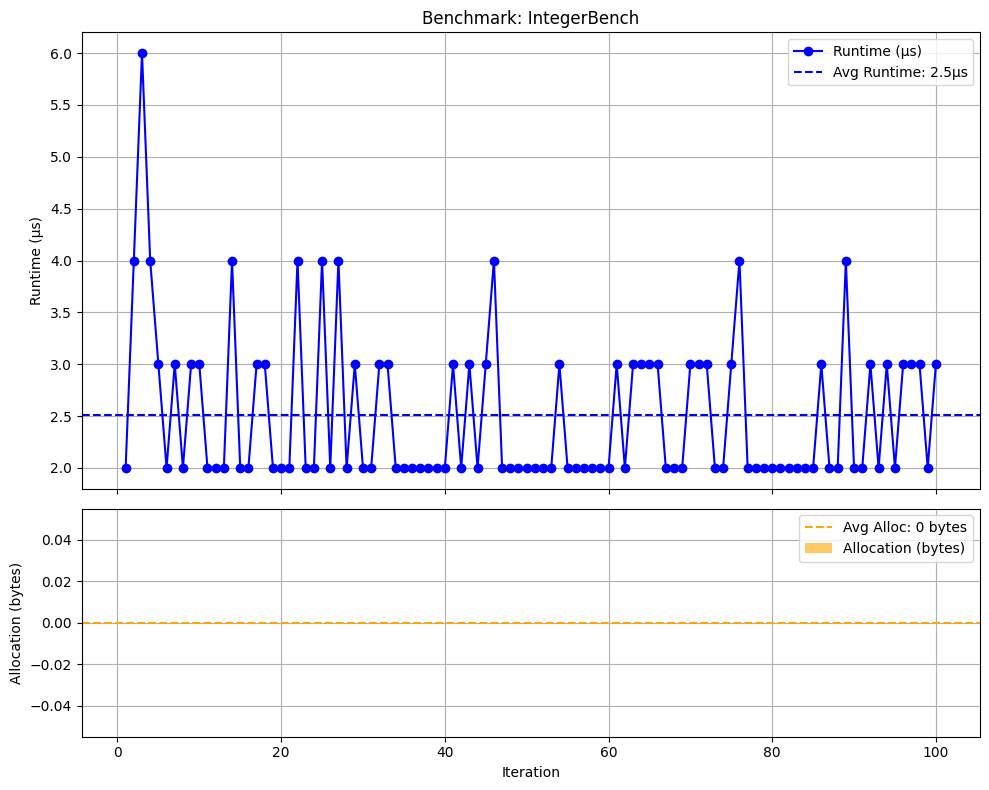

Benchmark: IntegerMedBench, Runs: 100, Runtimes: [22, 11, 11, 10, 9, 10, 13, 9, 15, 9, 9, 14, 9, 13, 13, 10, 9, 9, 9, 13, 9, 9, 10, 11, 10, 14, 10, 9, 14, 9, 10, 9, 9, 14, 10, 9, 13, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 9, 14, 10, 10, 10, 10, 23, 9, 10, 13, 10, 9, 10, 9, 9, 9, 18, 10, 10, 13, 10, 16, 13, 9, 10, 9, 9, 10, 10, 10, 9, 10, 11, 10, 10, 10, 9, 9, 9, 10, 10, 14, 9, 10, 14, 9, 13, 13, 10, 14, 13, 9], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


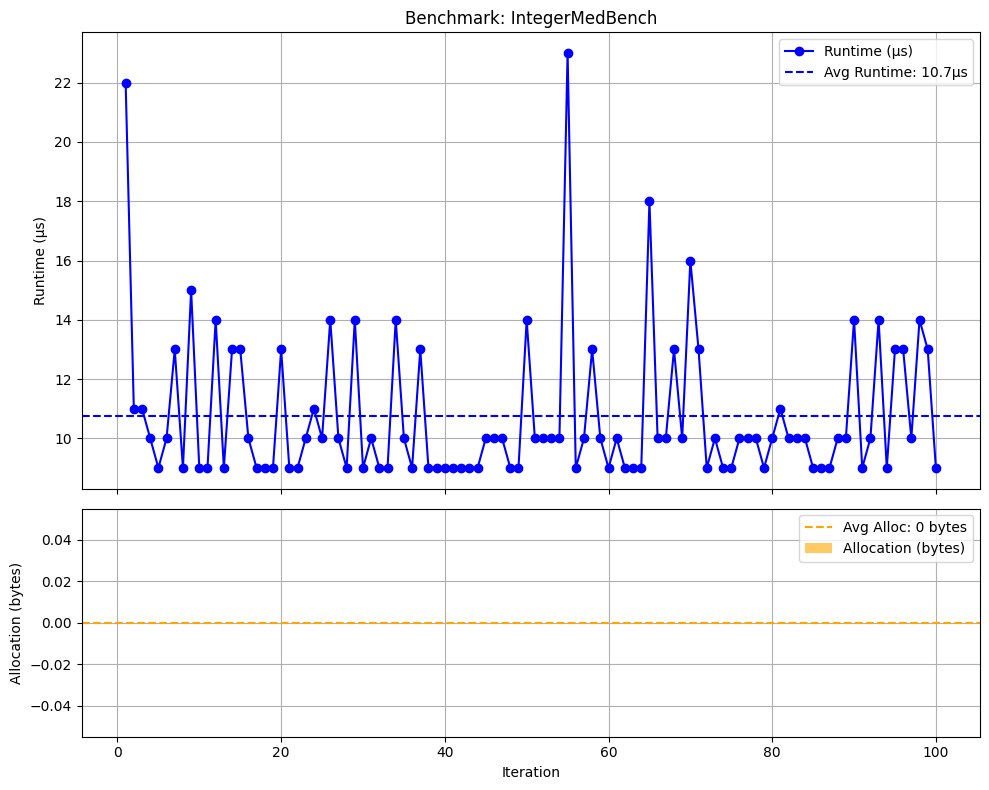

Benchmark: IntegerHighBench, Runs: 100, Runtimes: [81, 72, 70, 70, 69, 73, 69, 66, 72, 70, 69, 68, 66, 69, 67, 70, 71, 77, 70, 84, 74, 67, 69, 69, 68, 67, 69, 72, 69, 69, 69, 69, 73, 68, 94, 69, 67, 69, 67, 69, 69, 68, 70, 69, 70, 73, 69, 70, 70, 69, 69, 69, 69, 68, 72, 68, 67, 73, 68, 69, 71, 68, 69, 75, 70, 71, 69, 81, 69, 73, 72, 71, 77, 75, 69, 69, 70, 68, 69, 70, 69, 75, 72, 68, 71, 69, 68, 69, 70, 72, 68, 68, 69, 69, 72, 68, 78, 69, 70, 69], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


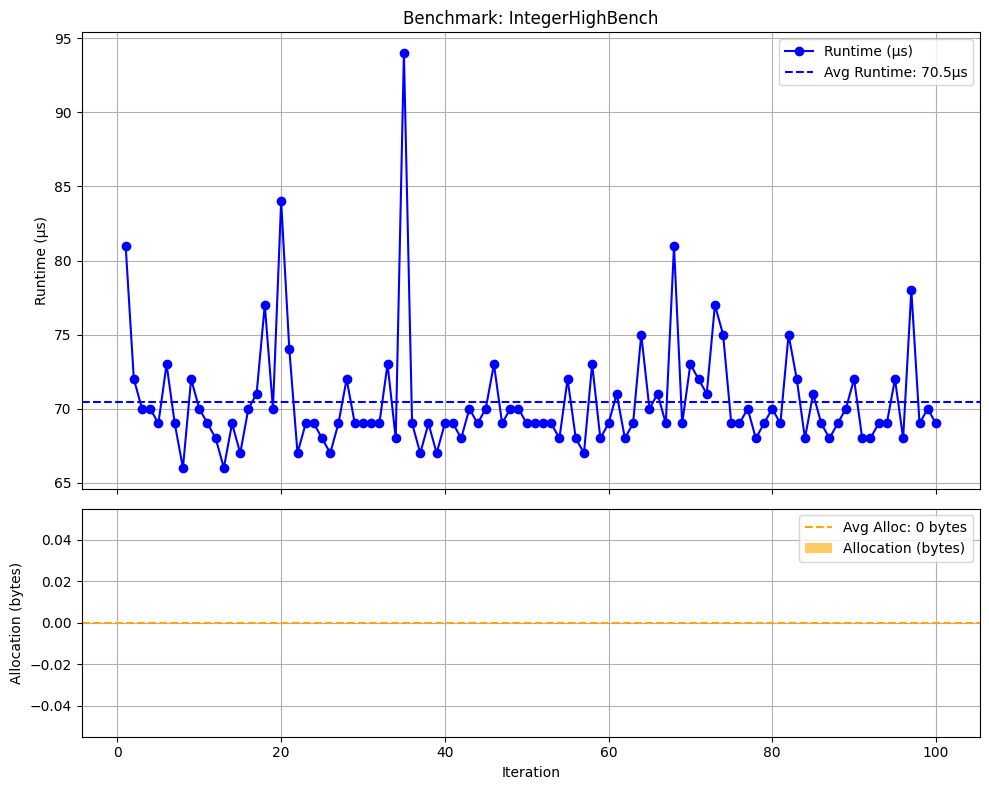

Benchmark: IntegerExpBench, Runs: 100, Runtimes: [55, 50, 49, 47, 51, 49, 48, 50, 49, 48, 49, 48, 49, 47, 51, 48, 48, 53, 48, 50, 47, 49, 53, 52, 49, 48, 49, 47, 47, 54, 52, 49, 47, 49, 49, 48, 53, 48, 48, 46, 52, 48, 56, 49, 46, 53, 47, 55, 49, 49, 48, 52, 52, 49, 50, 49, 54, 49, 50, 48, 53, 51, 49, 48, 55, 48, 48, 52, 54, 73, 48, 47, 53, 48, 49, 47, 53, 57, 53, 46, 49, 53, 57, 48, 55, 48, 48, 48, 48, 49, 53, 49, 49, 49, 54, 47, 50, 48, 49, 48], Allocations: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


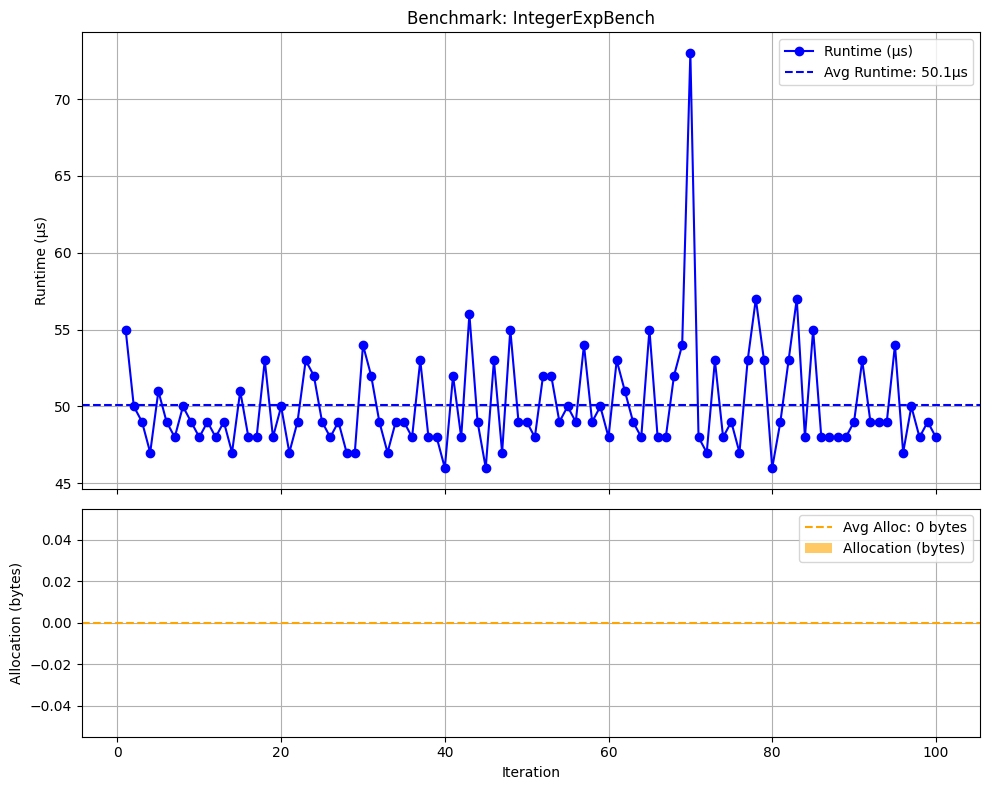

Benchmark: IntegerBigBench, Runs: 100, Runtimes: [574, 527, 535, 557, 535, 533, 553, 566, 548, 585, 545, 530, 576, 552, 568, 540, 570, 542, 545, 571, 552, 548, 566, 544, 549, 561, 548, 564, 576, 549, 567, 536, 540, 563, 562, 599, 530, 544, 533, 559, 554, 570, 568, 596, 546, 554, 561, 555, 577, 538, 520, 572, 557, 566, 641, 586, 554, 569, 601, 540, 573, 562, 549, 570, 530, 587, 553, 536, 518, 539, 525, 542, 545, 563, 545, 541, 834, 530, 560, 561, 558, 546, 558, 607, 543, 616, 575, 542, 531, 542, 541, 537, 533, 572, 572, 565, 530, 528, 524, 540], Allocations: [331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331776, 331

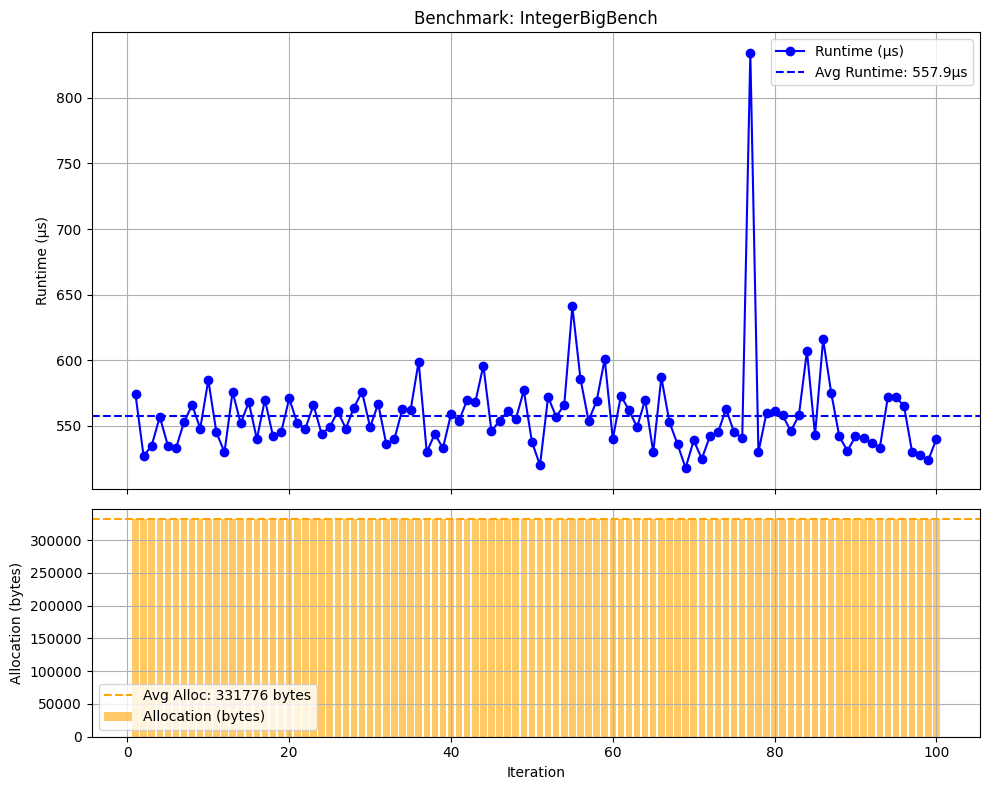

In [8]:
# General Configuration
BENCHMARKS = [
#    "DoubleBench",
#    "DoubleMedBench",
#    "DoubleHighBench",
#    "DoubleSqrtBench",
#    "DoubleLExpBench",
    "IntegerBench",
    "IntegerMedBench",
    "IntegerHighBench",
    "IntegerExpBench",
    "IntegerBigBench"
]

runs = 100

for benchmark in BENCHMARKS:
    outcome = exec_bench(benchmark, runs)
    print(f"Benchmark: {benchmark}, Runs: {runs}, Runtimes: {outcome[0]}, Allocations: {outcome[1]}")
    plot_results(benchmark, outcome[0], outcome[1])